In [1]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

0.45967286825180054
0.08420122414827347
0.004428494721651077
2.5825389457168058e-05
1.405010243615834e-05
5.259676072455477e-06
1.2637872259801952e-07
2.6676320885599125e-07
1.7021323017729628e-08
0.002586479065939784
3.578793985070661e-05
0.00022780669678468257
0.000358390185283497
3.3923771525223856e-07
1.4606215700041503e-05
8.496616601405549e-07
0.0006765009602531791
0.0028708765748888254
0.0021775385830551386
0.00023837885237298906
0.011039422824978828
2.817029962898232e-05
0.010281856171786785
0.011105927638709545
0.06313429027795792
0.03448827937245369
0.03271232545375824
0.04065534099936485
0.014550651423633099
0.09155623614788055


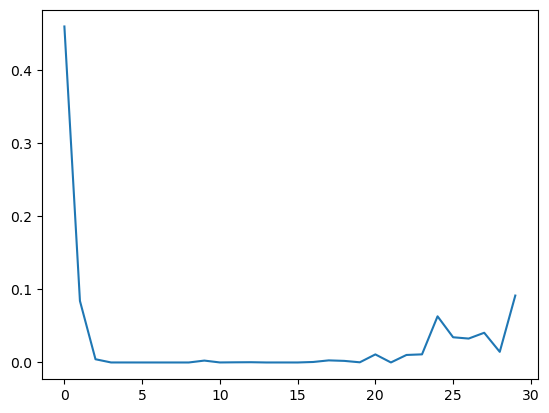

In [6]:
# from: https://towardsdatascience.com/intuition-behind-residual-neural-networks-fa5d2996b2c7

import math
import tensorflow as tf

def sin():
  while True:
    x = tf.random.normal((32, 10), math.pi, 1.5)
    y = tf.math.sin(x)
    yield (x, y)

def build_model(layers):
  x = inputs = tf.keras.Input((10, ))
  for _ in range(layers):
    x = tf.keras.layers.Dense(32, activation="relu")(x)
  x = tf.keras.layers.Dense(10)(x)
  model = tf.keras.Model(inputs, x)
  model.compile("adam", "mse")
  return model

dts = tf.data.Dataset.from_generator(sin, (tf.float32, tf.float32), ((32, 10), (32, 10)))

loss_by_depth = []
for t in range(1, 31):
  plain = build_model(t)
  hist = plain.fit(dts, steps_per_epoch=20, epochs=10*t, verbose=0)
  print(hist.history["loss"][-1])
  loss_by_depth.append(hist.history["loss"][-1])

plt.plot(loss_by_depth)

In [ ]:


def resblock(inputs):
  # Asumption: inputs is of last dimension 32.
  x = keras.layers.Dense(32, activation="relu")(inputs)
  x = keras.layers.Dense(32)(x)
  x = x + inputs # Skip connection
  x = keras.activations.relu(x)
  return x

def build_res_model(layers):
  x = inputs = keras.Input((10, ))
  x = keras.layers.Dense(32, activation="relu")(x)
  for _ in range(layers):
    x = resblock(x)
  x = keras.layers.Dense(10)(x)
  model = keras.Model(inputs, x)
  model.compile("adam", "mse")
  return model

dts = tf.data.Dataset.from_generator(sin, (tf.float32, tf.float32), ((32, 10), (32, 10)))


loss_by_depth = []
for t in range(1, 31):
  res_model = build_res_model(t)
  hist = res_model.fit(dts, steps_per_epoch=20, epochs=10*t, verbose=0)
  print(hist.history["loss"][-1])
  loss_by_depth.append(hist.history["loss"][-1])

plt.plot(loss_by_depth)


0.1550242006778717
0.043798770755529404
0.003592370543628931
0.00010709047637647018
0.003937436267733574
1.3616047308748214e-12
8.451031135336962e-06
8.255579553306802e-10
6.384235894074664e-05
2.7530091983862803e-08
2.605571012281871e-07
6.24968956794425e-12
4.4319652114932495e-11
1.7523121869089664e-06
2.984910235648286e-11
1.388373448207858e-06
9.943034910975257e-07
1.868321305664722e-05
1.0441424634632934e-11
1.535530827823095e-06
2.1101622849073465e-07
1.0728104168911123e-11
5.63701663125471e-09
0.00015028631605673581
1.4713132259203121e-06
1.0765335218820837e-06
1.7775536775843648e-07
4.7588116780517e-10
0.0007204797584563494


In [ ]:
build_model(5).summary()

In [ ]:
build_res_model(5).summary()